<a href="https://colab.research.google.com/github/davidogm/diversicrop-first-training-school/blob/main/Notebook_FAOSTAT_PEAS_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Production and Yield data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load the dataset:**

In [ ]:
path = '/content/drive/MyDrive/Datasets/WG2_FAOSTAT_PEAS_production_5-3-2024.xlsx'
# Reading data in excel file...
df = pd.read_excel(path)
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,8,Albania,5312,Area harvested,1242,"Peas, green",1961,1961,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
1,QCL,Crops and livestock products,8,Albania,5510,Production,1242,"Peas, green",1961,1961,t,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
2,QCL,Crops and livestock products,8,Albania,5312,Area harvested,1242,"Peas, green",1962,1962,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
3,QCL,Crops and livestock products,8,Albania,5510,Production,1242,"Peas, green",1962,1962,t,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
4,QCL,Crops and livestock products,8,Albania,5312,Area harvested,1242,"Peas, green",1963,1963,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN


Structure of the dataset:

In [ ]:
print(f'Rows= {df.shape[0]} \t Columns= {df.shape[1]}\n')

Rows= 29711 	 Columns= 15



Generic information about the dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29711 entries, 0 to 29710
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       29711 non-null  object 
 1   Domain            29711 non-null  object 
 2   Area Code (M49)   29711 non-null  int64  
 3   Area              29711 non-null  object 
 4   Element Code      29711 non-null  int64  
 5   Element           29711 non-null  object 
 6   Item Code (CPC)   29711 non-null  int64  
 7   Item              29711 non-null  object 
 8   Year Code         29711 non-null  int64  
 9   Year              29711 non-null  int64  
 10  Unit              29711 non-null  object 
 11  Value             29711 non-null  float64
 12  Flag              29711 non-null  object 
 13  Flag Description  29711 non-null  object 
 14  Note              667 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.4+ MB


Unique values per column:

In [ ]:
df.nunique()

Domain Code             1
Domain                  1
Area Code (M49)       125
Area                  125
Element Code            3
Element                 3
Item Code (CPC)         2
Item                    2
Year Code              62
Year                   62
Unit                    3
Value               17049
Flag                    5
Flag Description        5
Note                    1
dtype: int64

As we can see, some columns only have 1 value (the same in all records).



Statistical information:

In [ ]:
df.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,29711.000000,29711.000000,29711.000000,29711.000000,29711.000000,2.971100e+04
mean,428.112315,5413.781630,1487.470566,1993.969170,1993.969170,8.941780e+04
std,261.224336,82.617347,231.081956,17.780258,17.780258,5.223303e+05
min,8.000000,5312.000000,1242.000000,1961.000000,1961.000000,0.000000e+00
25%,200.000000,5312.000000,1242.000000,1979.000000,1979.000000,1.940000e+03
50%,410.000000,5419.000000,1705.000000,1996.000000,1996.000000,1.085500e+04
75%,643.000000,5510.000000,1705.000000,2009.000000,2009.000000,3.609200e+04
max,894.000000,5510.000000,1705.000000,2022.000000,2022.000000,1.182407e+07


But these statistical values don't provide useful information since some columns are IDs (such as 'Element Code').
That's why it's important to think about the meaning of the columns.  

For example, here we have some questions that we could ask ourselves:
- Is it useful to do some operations like mean or std in Year, Area Code...?
- Are all the records of the 'Value' column in the same measure unit?
- Is it useful to do this operations with IDs?


Now, we are going to evaluate the number of null values per column:

In [ ]:
df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                29044
dtype: int64

As we can see, the column 'Note' has many empty records...

Now we are going to display unique data in some of the columns:

In [ ]:
df['Flag Description'].unique()

array(['Missing value (data cannot exist, not applicable)',
       'Imputed value', 'Estimated value', 'Official figure',
       'Figure from international organizations'], dtype=object)

In [ ]:
df['Domain'].unique()

array(['Crops and livestock products'], dtype=object)

#### **Dropping unnecessary columns:**

Checking if both columns are exactly equivalent:



In [ ]:
(df['Year'] == df['Year Code']).sum() == len(df)

True

In [ ]:
columns_to_drop = ['Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag Description', 'Note']
df = df.drop(columns_to_drop, axis=1)
df[:4]

,Domain,Area,Element,Item,Year,Unit,Value,Flag
0,Crops and livestock products,Albania,Area harvested,"Peas, green",1961,ha,0.0,M
1,Crops and livestock products,Albania,Production,"Peas, green",1961,t,0.0,M
2,Crops and livestock products,Albania,Area harvested,"Peas, green",1962,ha,0.0,M
3,Crops and livestock products,Albania,Production,"Peas, green",1962,t,0.0,M


#### **Filtering and dividing the dataset**

The data with value equal to 0 is that a 0 is a value that make sense or is because there isn't data for that row???. Probably its because we do not have data for this, so we are going to remove this rows:

In [ ]:
df_with_no_zeros = df[df['Value'] > 0].copy()
df_with_no_zeros.sample(4)

,Domain,Area,Element,Item,Year,Unit,Value,Flag
7163,Crops and livestock products,Czechia,Area harvested,"Peas, green",1999,ha,2244.0,A
3126,Crops and livestock products,Bhutan,Yield,"Peas, dry",2012,100 g/ha,21872.0,E
9157,Crops and livestock products,Estonia,Production,"Peas, green",2011,t,91.0,A
27199,Crops and livestock products,Ukraine,Area harvested,"Peas, dry",2004,ha,258200.0,A


The different values for Area are the following:

In [ ]:
df_with_no_zeros['Element'].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

They are represented in different measure units, so we are going to divide the dataframe into the different scopes displayed before.

In [ ]:
production_df = df_with_no_zeros[df_with_no_zeros['Element'] == 'Production'].copy()
yield_df = df_with_no_zeros[df_with_no_zeros['Element'] == 'Yield'].copy()
harvested_df = df_with_no_zeros[df_with_no_zeros['Element'] == 'Area harvested'].copy()

In [ ]:
yield_df[(yield_df['Year'] > 2000)&(yield_df['Area'] == 'Greece')]

,Domain,Area,Element,Item,Year,Unit,Value,Flag
10784,Crops and livestock products,Greece,Yield,"Peas, dry",2001,100 g/ha,39245.0,A
10970,Crops and livestock products,Greece,Yield,"Peas, green",2001,100 g/ha,56760.0,A
10787,Crops and livestock products,Greece,Yield,"Peas, dry",2002,100 g/ha,37409.0,A
10973,Crops and livestock products,Greece,Yield,"Peas, green",2002,100 g/ha,59871.0,A
10790,Crops and livestock products,Greece,Yield,"Peas, dry",2003,100 g/ha,52426.0,A
10976,Crops and livestock products,Greece,Yield,"Peas, green",2003,100 g/ha,60274.0,A
10793,Crops and livestock products,Greece,Yield,"Peas, dry",2004,100 g/ha,56666.0,A
10979,Crops and livestock products,Greece,Yield,"Peas, green",2004,100 g/ha,64268.0,A
10982,Crops and livestock products,Greece,Yield,"Peas, green",2005,100 g/ha,65056.0,A
10796,Crops and livestock products,Greece,Yield,"Peas, dry",2005,100 g/ha,55118.0,A


In [ ]:
production_df

,Domain,Area,Element,Item,Year,Unit,Value,Flag
92,Crops and livestock products,Albania,Production,"Peas, green",2006,t,1914.00,A
95,Crops and livestock products,Albania,Production,"Peas, green",2007,t,2000.00,A
98,Crops and livestock products,Albania,Production,"Peas, green",2008,t,2430.00,A
101,Crops and livestock products,Albania,Production,"Peas, green",2009,t,2572.00,A
104,Crops and livestock products,Albania,Production,"Peas, green",2010,t,3071.00,A
...,...,...,...,...,...,...,...,...
29698,Crops and livestock products,Zimbabwe,Production,"Peas, green",2018,t,306.35,I
29701,Crops and livestock products,Zimbabwe,Production,"Peas, green",2019,t,443.40,A
29704,Crops and livestock products,Zimbabwe,Production,"Peas, green",2020,t,576.33,I
29707,Crops and livestock products,Zimbabwe,Production,"Peas, green",2021,t,106.25,I


In [ ]:
production_df.describe()

,Year,Value
count,9145.000000,9.145000e+03
mean,1994.979114,1.836549e+05
std,17.611950,8.660605e+05
min,1961.000000,1.000000e+00
25%,1980.000000,2.400000e+03
50%,1997.000000,1.178700e+04
75%,2010.000000,4.912400e+04
max,2022.000000,1.182407e+07


## Visualizations

First of all, we are going to visualize the entirely distributions of values per type (production, yield and Area Harvested).

Text(0, 0.5, 'Value')

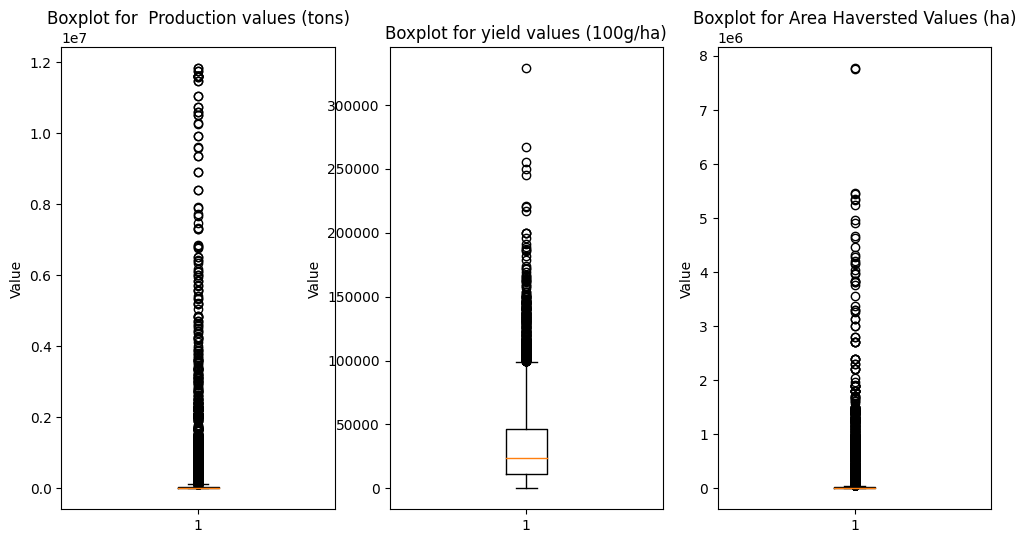

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(12, 6))


## Plotting data
axes[0].boxplot(production_df['Value'])
axes[0].set_title('Boxplot for  Production values (tons)')
axes[0].set_ylabel('Value')

axes[1].boxplot(yield_df['Value'])
axes[1].set_title('Boxplot for yield values (100g/ha)')
axes[1].set_ylabel('Value')

axes[2].boxplot(harvested_df['Value'])
axes[2].set_title('Boxplot for Area Haversted Values (ha)')
axes[2].set_ylabel('Value')

As we can observe, most of the values are very small, but some of them increase very quickly. This evolution could be caused by some reasons such as:
* The country
* Evolution over the years
* External reasons
* ...



#### **Distribution Plots:**

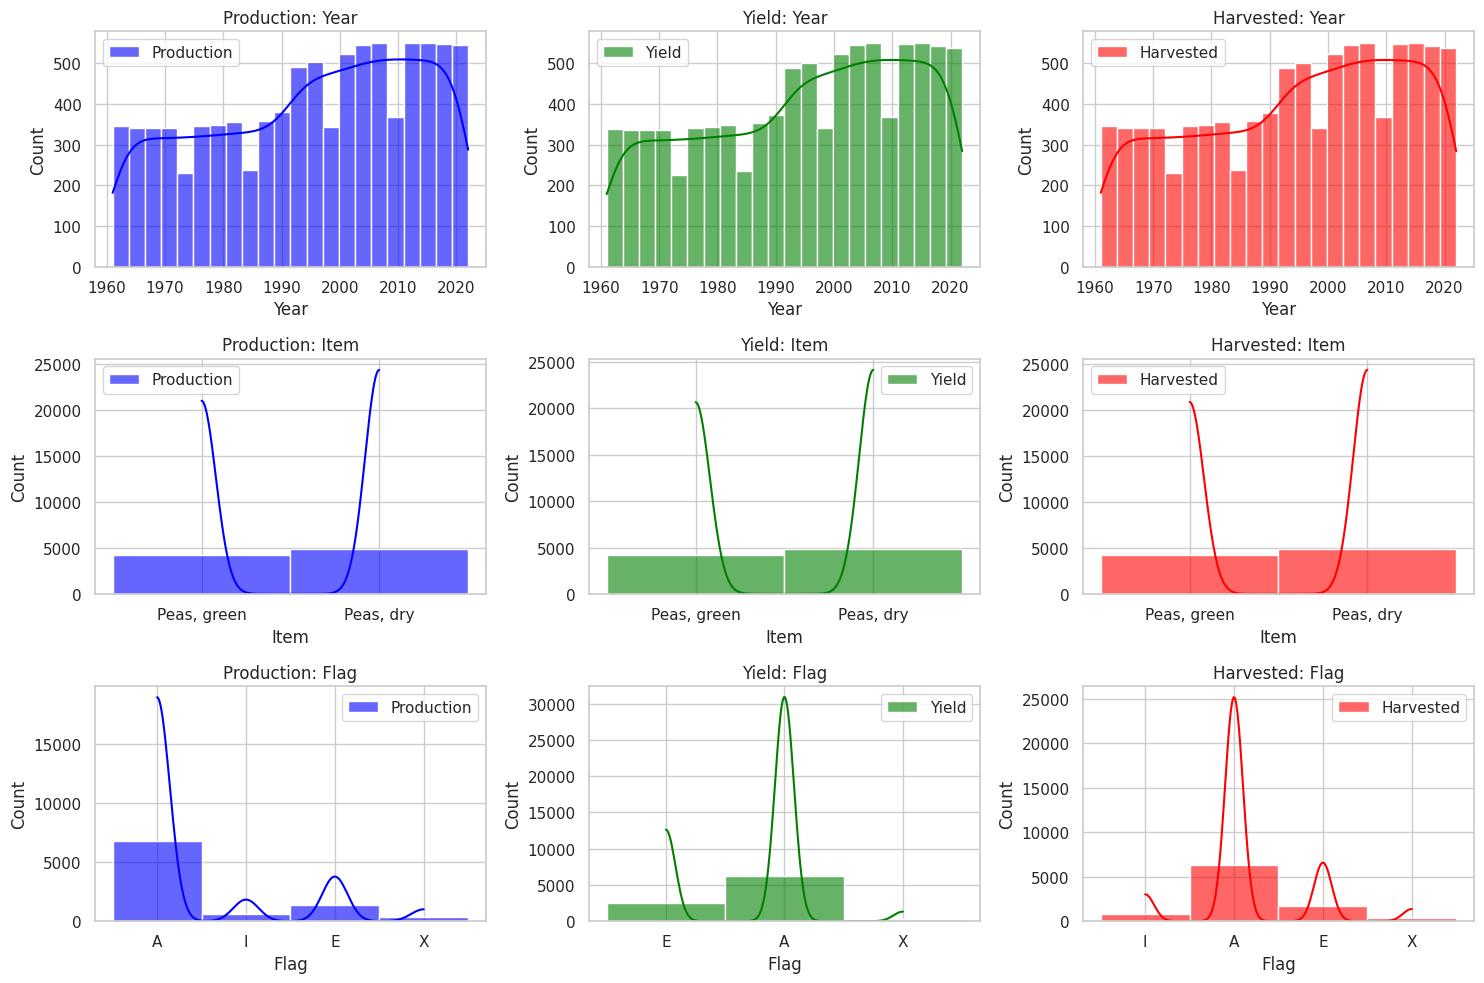

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
columns = ['Year', 'Item' ,'Flag']  # Asegúrate de que estas columnas están presentes en tus dataframes

# Configurar el tamaño del gráfico para acomodar todas las visualizaciones
fig, axes = plt.subplots(nrows=len(columns), ncols=3, figsize=(15, 10))

# Iterar sobre las columnas y crear un gráfico de distribución para cada dataframe
for i, col in enumerate(columns):
    # Plot para el dataframe de producción en la primera columna
    sns.histplot(production_df[col], ax=axes[i, 0], kde=True, color="blue", alpha=0.6, label='Production')
    axes[i, 0].set_title(f'Production: {col}')
    axes[i, 0].legend()

    # Plot para el dataframe de rendimiento en la segunda columna
    sns.histplot(yield_df[col], ax=axes[i, 1], kde=True, color="green", alpha=0.6, label='Yield')
    axes[i, 1].set_title(f'Yield: {col}')
    axes[i, 1].legend()

    # Plot para el dataframe de cosechado en la tercera columna
    sns.histplot(harvested_df[col], ax=axes[i, 2], kde=True, color="red", alpha=0.6, label='Harvested')
    axes[i, 2].set_title(f'Harvested: {col}')
    axes[i, 2].legend()

plt.tight_layout()
plt.show()


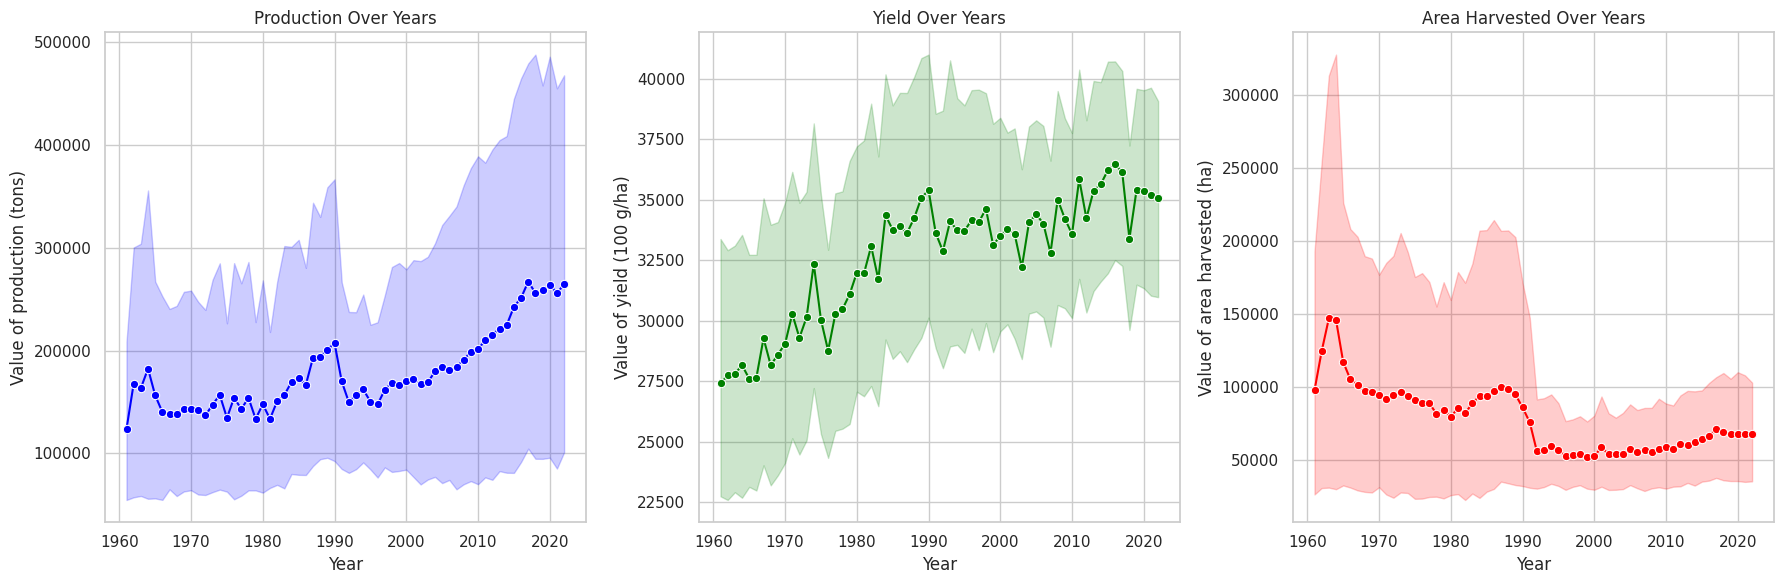

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

production_df = production_df.sort_values(by='Year')
yield_df = yield_df.sort_values(by='Year')
harvested_df = harvested_df.sort_values(by='Year')

# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Diagrama de línea con Seaborn para production_df
sns.lineplot(ax=axes[0], data=production_df, x='Year', y='Value', marker='o', color='blue')
axes[0].set_title('Production Over Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value of production (tons)')
axes[0].grid(True)

# Diagrama de línea con Seaborn para yield_df
sns.lineplot(ax=axes[1], data=yield_df, x='Year', y='Value', marker='o', color='green')
axes[1].set_title('Yield Over Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value of yield (100 g/ha)')
axes[1].grid(True)

# Diagrama de línea con Seaborn para harvested_df
sns.lineplot(ax=axes[2], data=harvested_df, x='Year', y='Value', marker='o', color='red')
axes[2].set_title('Area Harvested Over Years')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Value of area harvested (ha)')
axes[2].grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

Evolution of production, yield and Area harvested

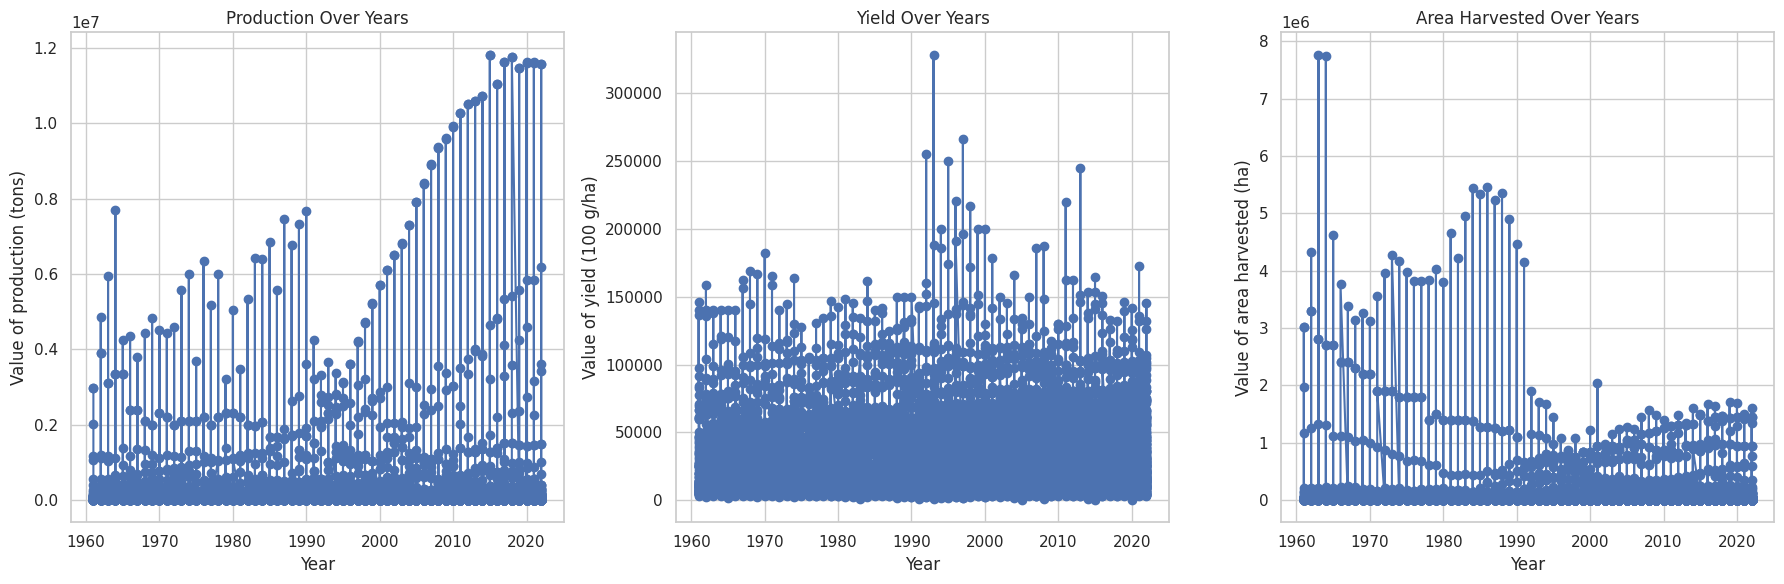

In [ ]:
production_df = production_df.sort_values(by='Year')
yield_df = yield_df.sort_values(by='Year')
harvested_df = harvested_df.sort_values(by='Year')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Graficar 'Value' vs 'Year' para production_df
axes[0].plot(production_df['Year'], production_df['Value'], marker='o', linestyle='-')
axes[0].set_title('Production Over Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value of production (tons)')
axes[0].grid(True)

# Graficar 'Value' vs 'Year' para yield_df
axes[1].plot(yield_df['Year'], yield_df['Value'], marker='o', linestyle='-')
axes[1].set_title('Yield Over Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value of yield (100 g/ha)')
axes[1].grid(True)

# Graficar 'Value' vs 'Year' para harvested_df
axes[2].plot(harvested_df['Year'], harvested_df['Value'], marker='o', linestyle='-')
axes[2].set_title('Area Harvested Over Years')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Value of area harvested (ha)')
axes[2].grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Feature selection:**

We need to encode the variables which are categorical to extract the correlation matrix between the variables

In [ ]:
X1 = production_df.copy()

In [ ]:
# Se identifican las columnas categóricas de X
cat_cols = X1.select_dtypes(include=['object']).columns.to_list()

# Se identifican las columnas numéricas de X
numeric_cols = X1.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Seleccionamos solo las columnas categóricas de X
X_cat1 = X1[cat_cols].copy()

# Creamos una instancia de LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Iteramos sobre las columnas categóricas y aplicamos label encoding
for col in cat_cols:
    X_cat[col] = label_encoder.fit_transform(X_cat[col])

# Concatenamos las columnas codificadas con las columnas numéricas de X
X_encoded = pd.concat([X_cat, X[numeric_cols]], axis=1)

# Mostramos la información sobre el nuevo DataFrame
X_encoded.info()
X_encoded.head()

NameError: name 'X_cat' is not defined

In [ ]:
cor = X_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()